In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zillow-dataset-test/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv
/kaggle/input/zillow-rental-data/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv
/kaggle/input/us-population-history/csvData.csv
/kaggle/input/zillow-inventory-dataset/Metro_invt_fs_uc_sfrcondo_smoothed_week.csv


# Import data with pandas.

In [56]:
data = pd.read_csv('../input/zillow-rental-data/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [57]:
data.head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,102001,United States,0,1354.0,1360.0,1366.0,1372,1378,1383,1389,...,1698,1700,1702,1704,1706,1707,1709,1710,1711,1712
1,394913,"New York, NY",1,2296.0,2307.0,2318.0,2329,2339,2350,2360,...,2698,2694,2686,2678,2671,2662,2653,2644,2635,2625
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1857.0,1870.0,1884.0,1897,1910,1923,1937,...,2542,2544,2545,2545,2546,2546,2546,2546,2545,2545
3,394463,"Chicago, IL",3,1527.0,1532.0,1537.0,1542,1546,1551,1555,...,1778,1778,1777,1776,1776,1775,1774,1772,1771,1770
4,394514,"Dallas-Fort Worth, TX",4,1222.0,1228.0,1234.0,1240,1245,1251,1257,...,1560,1562,1563,1564,1566,1567,1568,1570,1571,1572


# Filter by RegionName and focus on Atlanta, GA

In [58]:
data = data[data['RegionName'] == 'Atlanta, GA']

**Drop unnecessary columns.**

In [59]:
data = data.drop(['RegionID', 'RegionName', 'SizeRank'], axis = 1)

**Transpose the data from data analysis purpose.**

In [60]:
data = data.transpose()

**Reset index to make sure the month shown as a column (index).**

In [62]:
data.reset_index()

,index,9
0,2014-01,1139.0
1,2014-02,1144.0
2,2014-03,1148.0
3,2014-04,1152.0
4,2014-05,1157.0
...,...,...
76,2020-05,1568.0
77,2020-06,1572.0
78,2020-07,1576.0
79,2020-08,1580.0


# Take a quick view of what the trend looks like.

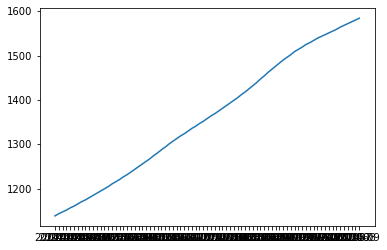

In [63]:
plt.plot(data.index, data[9])

# Load another csv file as a dataset.

In [64]:
df_P = pd.read_csv('../input/zillow-dataset-test/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [66]:
df_P

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,102001,0,United States,Country,NaN,107296.0,107323.0,107373.0,107499.0,107643.0,...,246250.0,247070.0,247968.0,248982.0,250125.0,251327.0,252441.0,253570.0,254920.0,256663.0
1,394913,1,"New York, NY",Msa,NY,188579.0,188139.0,187859.0,187323.0,187005.0,...,481883.0,482365.0,483167.0,484153.0,485134.0,486273.0,487442.0,488880.0,490864.0,493579.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,184675.0,184932.0,184952.0,185060.0,185033.0,...,671763.0,674427.0,677853.0,683048.0,688283.0,692527.0,694078.0,695207.0,699530.0,706714.0
3,394463,3,"Chicago, IL",Msa,IL,161914.0,161616.0,161224.0,160779.0,160181.0,...,241491.0,241607.0,241885.0,242259.0,242806.0,243219.0,243617.0,244099.0,245049.0,246357.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111245.0,111308.0,111467.0,111785.0,112128.0,...,252877.0,253090.0,253545.0,254217.0,255208.0,256323.0,257406.0,258658.0,260101.0,261739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,73185.0,73409.0,73561.0,73664.0,73755.0,73917.0,74136.0,74394.0,74593.0,74791.0
911,753874,930,"Craig, CO",Msa,CO,61216.0,61442.0,61681.0,62146.0,62476.0,...,190117.0,189739.0,189313.0,189186.0,189190.0,189272.0,189324.0,189450.0,189484.0,189500.0
912,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,106743.0,107678.0,109212.0,110367.0,111430.0,111927.0,112645.0,113606.0,114354.0,114579.0
913,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,69482.0,69546.0,69476.0,69340.0,69202.0,69110.0,69096.0,69035.0,69022.0,69010.0


**Get all the column names for dropping purpose.**

In [67]:
cols = df_P.keys()

**Drop the first 5 coulmns and keep all the row data.**

In [68]:
df_P2 = df_P.loc[:, cols[5]:cols[-1]]

**Check the current coumn names.**

In [69]:
df_P2.keys()

Index(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30', '1996-05-31',
       '1996-06-30', '1996-07-31', '1996-08-31', '1996-09-30', '1996-10-31',
       ...
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
      dtype='object', length=296)

# Load another csv file with pandas.

In [71]:
df_I = pd.read_csv('../input/zillow-inventory-dataset/Metro_invt_fs_uc_sfrcondo_smoothed_week.csv')

In [72]:
df_I

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,...,2020-06-27,2020-07-04,2020-07-11,2020-07-18,2020-07-25,2020-08-01,2020-08-08,2020-08-15,2020-08-22,2020-08-29
0,102001,0,United States,Country,NaN,1328960.0,1321932.0,1311109.0,1297957.0,1279448.0,...,1101940.0,1089379.0,1077606.0,1067797.0,1058561.0,1050342.0,1040990.0,1030206.0,1020910.0,1012615.0
1,394913,1,"New York, NY",Msa,NY,68127.0,67625.0,66831.0,65879.0,64627.0,...,61974.0,62941.0,64085.0,65117.0,65978.0,66595.0,66701.0,66867.0,66836.0,67023.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,17828.0,17558.0,17215.0,16861.0,16399.0,...,17422.0,17353.0,17296.0,17265.0,17295.0,17359.0,17377.0,17369.0,17335.0,17301.0
3,394463,3,"Chicago, IL",Msa,IL,38000.0,37577.0,36914.0,36115.0,35060.0,...,32749.0,32570.0,32425.0,32313.0,32231.0,32249.0,32178.0,31975.0,31923.0,31901.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,21917.0,21840.0,21551.0,21306.0,20881.0,...,25622.0,25309.0,25029.0,24692.0,24316.0,23977.0,23571.0,23176.0,22751.0,22356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,394586,504,"Faribault, MN",Msa,MN,NaN,NaN,NaN,NaN,NaN,...,205.0,200.0,196.0,192.0,186.0,189.0,186.0,186.0,189.0,186.0
117,394309,527,"Albemarle, NC",Msa,NC,211.0,209.0,207.0,208.0,206.0,...,129.0,127.0,123.0,118.0,116.0,114.0,113.0,110.0,109.0,107.0
118,394742,595,"Kerrville, TX",Msa,TX,339.0,338.0,338.0,339.0,337.0,...,318.0,320.0,319.0,319.0,319.0,318.0,315.0,312.0,309.0,303.0
119,395091,641,"Shelbyville, TN",Msa,TN,158.0,163.0,166.0,167.0,165.0,...,170.0,173.0,174.0,174.0,173.0,167.0,162.0,157.0,152.0,154.0


# Concatenate the 2 datasets and save it as a new dataset.

In [73]:
df_total = pd.concat([df_P, df_I], ignore_index = False)

In [74]:
df_total

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-06-27,2020-07-04,2020-07-11,2020-07-18,2020-07-25,2020-08-01,2020-08-08,2020-08-15,2020-08-22,2020-08-29
0,102001,0,United States,Country,NaN,107296.0,107323.0,107373.0,107499.0,107643.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,394913,1,"New York, NY",Msa,NY,188579.0,188139.0,187859.0,187323.0,187005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,184675.0,184932.0,184952.0,185060.0,185033.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394463,3,"Chicago, IL",Msa,IL,161914.0,161616.0,161224.0,160779.0,160181.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111245.0,111308.0,111467.0,111785.0,112128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,394586,504,"Faribault, MN",Msa,MN,NaN,NaN,NaN,NaN,NaN,...,205.0,200.0,196.0,192.0,186.0,189.0,186.0,186.0,189.0,186.0
117,394309,527,"Albemarle, NC",Msa,NC,NaN,NaN,NaN,NaN,NaN,...,129.0,127.0,123.0,118.0,116.0,114.0,113.0,110.0,109.0,107.0
118,394742,595,"Kerrville, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,318.0,320.0,319.0,319.0,319.0,318.0,315.0,312.0,309.0,303.0
119,395091,641,"Shelbyville, TN",Msa,TN,NaN,NaN,NaN,NaN,NaN,...,170.0,173.0,174.0,174.0,173.0,167.0,162.0,157.0,152.0,154.0


# Load population history file.

In [75]:
df_Population = pd.read_csv('../input/us-population-history/csvData.csv')

In [76]:
df_Population

,Year,TotalPopulation,GrowthRate,Density,TotalPopulationRank,DensityRank
0,2020,331002.651,0.0059,36.1854,3,175
1,2019,329064.917,0.0060,35.9735,3,175
2,2018,327096.265,0.0062,35.7583,3,175
3,2017,325084.756,0.0064,35.5384,3,175
4,2016,323015.995,0.0067,35.3122,3,174
5,2015,320878.310,0.0076,35.0786,3,173
6,2010,309011.475,0.0093,33.7813,3,173
7,2005,294993.511,0.0093,32.2488,3,171
8,2000,281710.909,0.0122,30.7968,3,170
9,1995,265163.745,0.0101,28.9878,3,166


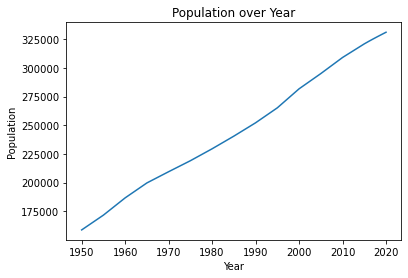

In [77]:
plt.plot(df_Population['Year'],df_Population['TotalPopulation'])
plt.title('Population over Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

**Plot population growth rate over year since 1950.**

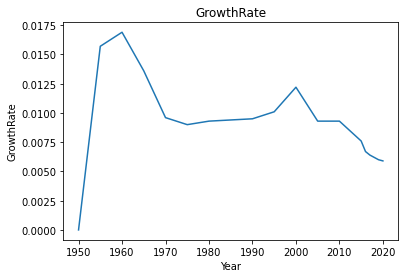

In [78]:
plt.plot(df_Population['Year'],df_Population['GrowthRate'])
plt.title('GrowthRate')
plt.xlabel('Year')
plt.ylabel('GrowthRate')
plt.show()

In [79]:
df_P.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31
0,102001,0,United States,Country,NaN,107296.0,107323.0,107373.0,107499.0,107643.0,...,246250.0,247070.0,247968.0,248982.0,250125.0,251327.0,252441.0,253570.0,254920.0,256663.0
1,394913,1,"New York, NY",Msa,NY,188579.0,188139.0,187859.0,187323.0,187005.0,...,481883.0,482365.0,483167.0,484153.0,485134.0,486273.0,487442.0,488880.0,490864.0,493579.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,184675.0,184932.0,184952.0,185060.0,185033.0,...,671763.0,674427.0,677853.0,683048.0,688283.0,692527.0,694078.0,695207.0,699530.0,706714.0
3,394463,3,"Chicago, IL",Msa,IL,161914.0,161616.0,161224.0,160779.0,160181.0,...,241491.0,241607.0,241885.0,242259.0,242806.0,243219.0,243617.0,244099.0,245049.0,246357.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111245.0,111308.0,111467.0,111785.0,112128.0,...,252877.0,253090.0,253545.0,254217.0,255208.0,256323.0,257406.0,258658.0,260101.0,261739.0


**Filter Atlanta, GA population.**

In [80]:
df_ATL = df_P[df_P['RegionName'] == 'Atlanta, GA']

**Filter CHicago, IL population**

In [82]:
df_CHI = df_P[df_P['RegionName'] == 'Chicago, IL']

In [83]:
df_ATL = df_ATL.transpose()

In [84]:
df_CHI = df_CHI.transpose()

**Drop unnecessary rows and only keep the numerical population data.**

In [87]:
df_ATL_New = df_ATL.drop(['RegionID','SizeRank','RegionName','RegionType','StateName'])

In [88]:
df_CHI_New = df_CHI.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

**Take August of each year as an example and check the population over years.**

In [91]:
df_ATL_Aug = df_ATL_New.filter(like = '08-31', axis = 0)

In [92]:
df_CHI_Aug = df_CHI_New.filter(like = '08-31', axis = 0)

In [94]:
df_ATL_Aug.reset_index()

,index,9
0,1996-08-31,123644
1,1997-08-31,129350
2,1998-08-31,137296
3,1999-08-31,146611
4,2000-08-31,157876
5,2001-08-31,168683
6,2002-08-31,175808
7,2003-08-31,179981
8,2004-08-31,184276
9,2005-08-31,190863


In [95]:
df_CHI_Aug = df_CHI_Aug.reset_index()

In [98]:
df_ATL_Aug = df_ATL_Aug.reset_index()

In [101]:
df_ATL_Aug.index = np.arange(1996, len(df_ATL_Aug)+1996)

In [103]:
df_CHI_Aug.index = np.arange(1996, len(df_CHI_Aug)+1996)

In [104]:
df_CHI_Aug

,index,3
1996,1996-08-31,159948
1997,1997-08-31,162136
1998,1998-08-31,149873
1999,1999-08-31,164450
2000,2000-08-31,176701
2001,2001-08-31,191596
2002,2002-08-31,206166
2003,2003-08-31,220630
2004,2004-08-31,238194
2005,2005-08-31,258869


**Plot Atlanta, GA home medium price over years.**

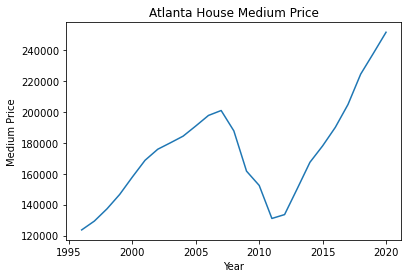

In [105]:
plt.plot(df_ATL_Aug.index.values,df_ATL_Aug[9])
plt.title('Atlanta House Medium Price')
plt.xlabel('Year')
plt.ylabel('Medium Price')
plt.savefig('p6.png', dpi = 399)
plt.savefig('p6.pdf', dpi = 399)

**Plot house medium price among various cities.**

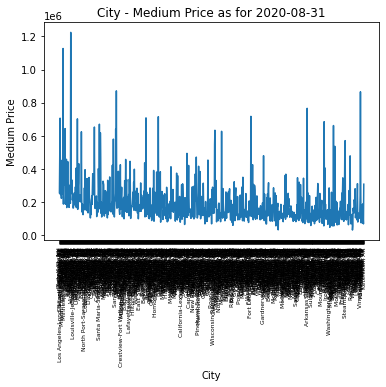

<Figure size 72000x57600 with 0 Axes>

In [108]:
plt.plot(df_P['RegionName'],df_P['2020-08-31'])
plt.title('City - Medium Price as for 2020-08-31')
plt.xlabel('City')
plt.ylabel('Medium Price')
plt.xticks(df_P['RegionName'], fontsize = 6, rotation = 'vertical')
plt.figure(figsize=(1000,800))
plt.show()

**Filter the top 5 state based on RegionID.**

In [109]:
df_State = df_I.groupby('StateName').nunique().sort_values(by = ['RegionID'], ascending = False)[:5]

In [110]:
df_State.index

Index(['CA', 'FL', 'TX', 'OH', 'NC'], dtype='object', name='StateName')

**Filter data and only keep CA and FL states.**

In [111]:
df2 = df_I[(df_I['StateName'] == 'CA') | (df_I['StateName'] == 'FL')]

**Plot only the 2 states data with Seaborn.**

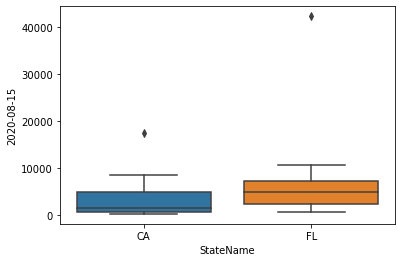

In [113]:
sns.boxplot(x = 'StateName', y = '2020-08-15', data=df2)

**Filter house medium price for Atlanta, GA**

In [114]:
df_ATL = df_P[df_P['RegionName'] == 'Atlanta, GA']

**Drop unnecessary coulmns.**

In [118]:
df_ATL = df_ATL.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], axis=1)

In [119]:
df_ATL = df_ATL.transpose()

In [142]:
df_ATL = df_ATL.reset_index()

In [159]:
df_ATL

,index,9
0,1996-01-31,120761.0
1,1996-02-29,120991.0
2,1996-03-31,121213.0
3,1996-04-30,121704.0
4,1996-05-31,122187.0
...,...,...
291,2020-04-30,245643.0
292,2020-05-31,246755.0
293,2020-06-30,248184.0
294,2020-07-31,249725.0


**Filter by index to ensure only 1 data displayed in each year.**

In [167]:
df_ATL = df_ATL[df_ATL.index % 12 == 0]

In [192]:
df_ATL

,index,9
0,1996-01-31,120761.0
12,1997-01-31,125922.0
24,1998-01-31,132600.0
36,1999-01-31,140739.0
48,2000-01-31,150912.0
60,2001-01-31,163039.0
72,2002-01-31,172133.0
84,2003-01-31,177721.0
96,2004-01-31,181579.0
108,2005-01-31,186763.0


In [196]:
x = np.arange(25)

In [197]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

# Plot house medium price in Atlanta, GA over years.

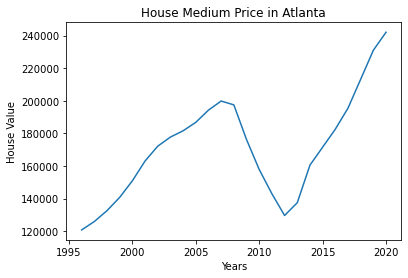

In [199]:
plt.plot(x+1996,df_ATL[9])
plt.title('House Medium Price in Atlanta')
plt.xlabel('Years')
plt.ylabel('House Value')
#plt.xticks(fontsize=8, rotation = 45)
plt.show()